# Machine Learning: Preço de Imóveis

Quando um cliente deseja alugar ou comprar um imóvel existem diversos fatores para sua escolha ideal, desde necessidades pessoais, perfil do cliente, características socieconômicas e etc. Entretanto, existem várias características do imóvel que podem valoriza-lo, como por exemplo, sua localização, segurança, vista, andar, elavador, infraestrutura, vagas na garagem, lazer e etc.

Nesse notebook será analisando um conjunto de imóveis, no qual o principal interesse e prever o valor de cada imóvel com base nas suas características.

## 1 - Coleta de dados

Os dados que serão analisados estão separados em dois arquivos, o primeiro nomeado **train.csv**, ele está composto com 81 colunas e será utilizado para testar o modelo. Já o segundo arquivo está nomeado como **test.csv** e será utilizado para testes.

Para facilitar no pré processamento dos dados, os dois dataset serão agregados nessa etapa. Para leitura e concatenação será utilizado a biblioteca *pandas*, na qual essas informações serão armazenadas em DataFrames.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

sns.set_palette(sns.color_palette('YlOrBr', 7))

In [8]:
df_treino = pd.read_csv('https://raw.githubusercontent.com/DarleySoares/Data-Science/master/Machine_Learning_Preco_de_Casas/data/train.csv') 
df_teste = pd.read_csv('https://raw.githubusercontent.com/DarleySoares/Data-Science/master/Machine_Learning_Preco_de_Casas/data/test.csv')

df_teste['SalePrice'] = 1

df = df_treino.append(df_teste, ignore_index = True)

limite_df_treino = len(df_treino)
inicio_df_teste = len(df) - len(df_treino)

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2 - Pré processamento de dados

Nessa etapa será realizada toda a tratativa nos DataFrames, isso significa que todos os dados ausentes serão modificados, colunas que não agregam informações relevantes serão excluídas, os dados serão padronizados, variáveis categóricas transformadas em discretas, criação de feature engennering e etc. Para iniciar esse processo será utilizado o método *info()* para retornar todas as colunas com a quantidade de dados não nulos e qual o tipo de variável de cada uma delas.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

A primeira coluna que apresenta dados ausentes é a **MSZoning**, ela identifica a classificação geral de zoneamento de venda de acordo com as seguintes categorias:

**A:** Agricultura

**C:** Comercial

**FV:** Vila flutuante residencial

**I:** Industrial

**RH:** Residencial de alta densidade

**RL:** Residencial de baixa densidade

**RP:** Parque residencial de baixa densidade

**RM:** Residencial de média densidade

Para essa coluna será utilizado o método de verificar a coluna **MSSubClass** que idenfitica o  tipo de moradia envolvida na venda. Ela será importante porque será agrupado por tipo de moradia e verificada o zoneamento que é mais recorrente em cada um delas.

In [34]:
df.loc[pd.isnull(df.MSZoning)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1915,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,...,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal,1
2216,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,1
2250,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,1
2904,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,1


In [35]:
agrupamento = df.groupby(['MSSubClass']).MSZoning.apply(lambda x: x.mode())
valores = list(agrupamento.values)
index = list(agrupamento.index)
index = list(map(lambda x: x[0], index))
dicionario = dict(zip(index,valores))

df.MSZoning.loc[pd.isnull(df.MSZoning)] = df.MSSubClass.map(dicionario)

A próxima coluna é a **LotFrontage**, ela informa a quantidade linear do lote que está diretamente conectado a rua. Para essa análise já será utilizada a coluna **MSZoning** para verificar se existe algum padrão desse tamanho.

In [41]:
df.loc[pd.isnull(df.LotFrontage)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,2848,20,RL,NaN,11088,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,1
2850,2851,60,RL,NaN,21533,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,1
2900,2901,20,RL,NaN,50102,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Alloca,1
2901,2902,20,RL,NaN,8098,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,1


Verificando o gráfico de boxplot, é possível verificar que para algumas áreas o tamanho frontal do lote está em uma faixa bem distribuída, entretanto para outros existem outliers, principalmente para o mais recorrente no dataset. Como existem bastentes outliers será utilizado a mediana para preencher esses valores ausentes.

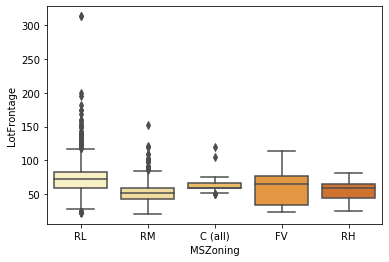

In [48]:
fig, ax = plt.subplots()
sns.boxplot(x = df.MSZoning, y = df.LotFrontage)
plt.show()

In [52]:
agrupamento = df.groupby(['MSZoning'])

df.LotFrontage = agrupamento.LotFrontage.apply(lambda x: x.fillna(x.median()))

A coluna **Alley** representa qual é o tipo de acesso do beco ao imóvel, podendo ser categorizado como:

**Grvl:** Cascalho

**Pave:** Pavimentado

Como existem muitos dados ausentes, será criado uma terceira categoria nomeada **Does not exist** para informar que não existe esse tipo de acesso na casa.

In [54]:
df.loc[pd.isnull(df.Alley)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,1
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,1
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,1
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,1


In [56]:
df.Alley = df.Alley.fillna('Does not exist')

In [58]:
df.loc[pd.isnull(df.Utilities)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1915,1916,30,RM,109.0,21780,Grvl,Does not exist,Reg,Lvl,NaN,...,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal,1
1945,1946,20,RL,72.0,31220,Pave,Does not exist,IR1,Bnk,NaN,...,0,NaN,NaN,Shed,750,5,2008,WD,Normal,1
